#  LINEAR SEPARABLE DATA
<img align="left" width="200" height="300" src="LSD.png">

&nbsp;                                                                                                                            
&nbsp;                                                                                                                                                       
&nbsp;                                                                                                                            
&nbsp;
&nbsp;                                                                                                                                                       
&nbsp;                                                                                                                            
&nbsp; 
                                                                                                                               

Linear Separability DATA
&nbsp; 

Consider the two randomly generated data patterns $ (W,W[2])$ being classified into two classes. 

&nbsp;
&nbsp;
Each point is symbolized and <img align="left" width="20" height="20" src="LSD2.png"> have a pattern grouping the values into $ (W,W[2])$ sets. The each pattern is classified into one of two classes. Notice that these classes can be separated with a single line $ L$. They are known as linearly separable patterns. Linear separability refers to the fact that classes of patterns with $ n$-dimensional vector $ {\bf x} = (w1, w2, ... , wn)$ can be separated with a single decision surface. In the case above, the line $ L$ represents the decision surface.


The processing unit of a single-layer perceptron network is able to categorize a set of patterns into two classes as the linear threshold function defines their linear separability. Conversely, the two classes must be linearly separable in order for the perceptron network to function correctly. Indeed, this is the main limitation of a single-layer perceptron network.

The most widely known linearly inseparable pattern is a logical exclusive function, also known as XOR function. The illustration shows that the two classes , the black dot represent zero (0) and the white dot represents one (1). Notice that the data sets can not be separate by a single line but requires two lines. The solution seems that patterns of $ (X1,X2)$ can only logically classified with two lines $ L_1$ and $ L_2$.



  <img align="center" width="500" height="400" src="XOR.png">

In [20]:
using Plots

#### CREATE TWO RANDOM DATA SETS

In [21]:
function make_random_linearSeparable_data(n, ϵ)
    w = rand(2)                             # creates random two element array
    w[2] = w[2]/5                           # takes the second element and divides by 5 and assigns it to w[2]
    Data = rand(n,2)                        # creates 2 element arrays with n rows
    Data = [(Data[i,1], Data[i,2]) for i = 1:n     
            if abs(Data[i,2] - w[1]*Data[i,1] - w[2]) > ϵ]
    Y = [Data[i][2] > w[1]*Data[i][1] + w[2] ? 1 : -1 for i = 1:size(Data)[1]]        
    
            
    return Data, Y, w
end

make_random_linearSeparable_data (generic function with 1 method)

In [30]:
D, Y, coeff = make_random_linearSeparable_data(50, 0.02)    # input n = 50 and epsilon = 0.02 to make tuples

(Tuple{Float64,Float64}[(0.208759, 0.952372), (0.419386, 0.664385), (0.559438, 0.250538), (0.853096, 0.115513), (0.820847, 0.140808), (0.97194, 0.366553), (0.761211, 0.336888), (0.664208, 0.897811), (0.100311, 0.14491), (0.0361252, 0.439503)  …  (0.855437, 0.340332), (0.639943, 0.995216), (0.185463, 0.811732), (0.449336, 0.950417), (0.0914597, 0.605413), (0.904241, 0.736321), (0.868227, 0.674123), (0.119395, 0.88264), (0.411311, 0.0897114), (0.565248, 0.869413)], [1, 1, -1, -1, -1, -1, -1, 1, -1, 1  …  -1, 1, 1, 1, 1, -1, -1, 1, -1, 1], [0.848841, 0.149167])

The tuples created at random are scattered and the pattern of the two groups is only visible by the (L) line that separates the two groups.

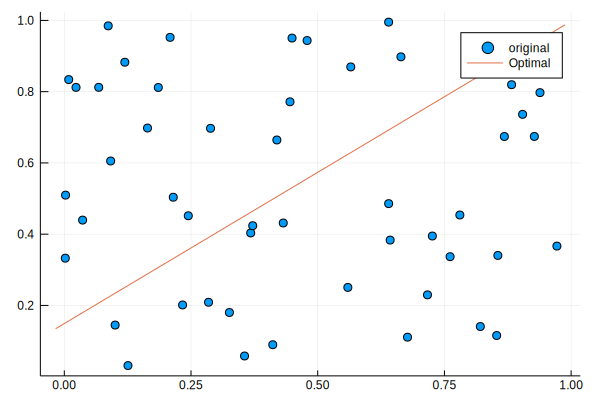

In [31]:
scatter(D, label = "original")
plot!(x -> coeff[1]*x + coeff[2], label = "Optimal")

The Perceptron model is used to define separable data and repeated multiple times.

In [6]:
function perceptron(data, labels, w)
        
    # Define hypothesis function 
    h(x) = w'*[1.0, x[1], x[2]] < 0 ? -1 : 1
    
    for i = 1:size(data)[1]
        if h(data[i]) != labels[i]
            w += labels[i]*[1.0, data[i][1], data[i][2]]
        end
    end
    return w
end

perceptron (generic function with 1 method)

In [7]:
w = perceptron(D, Y, rand(3));

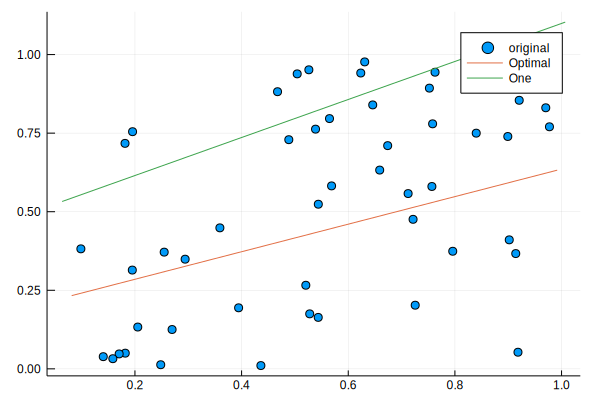

In [8]:
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "One")

In [9]:
w = perceptron(D, Y, w);

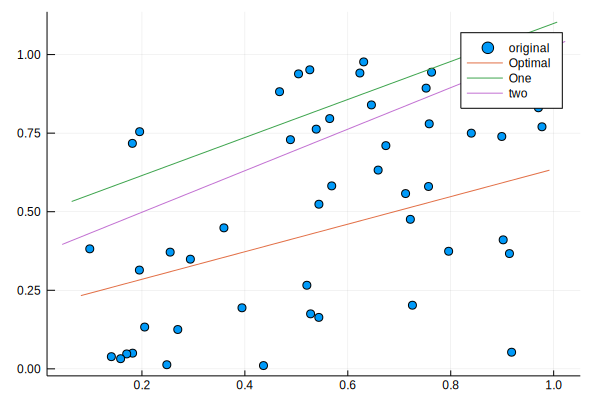

In [10]:
plot!(x -> (-w[1]-w[2]*x)/w[3],label="two")

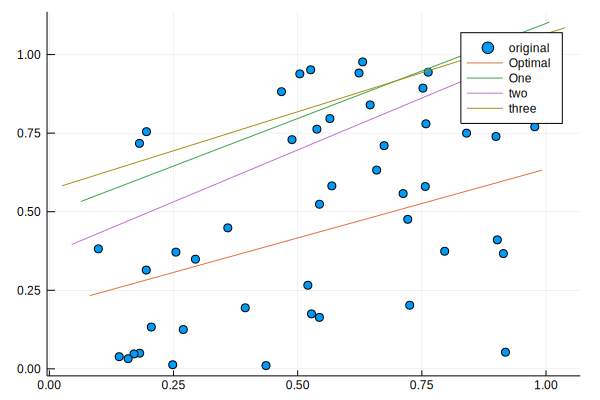

In [11]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="three")

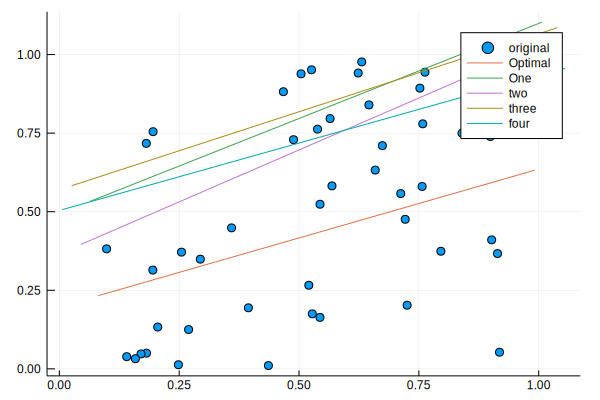

In [12]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="four")

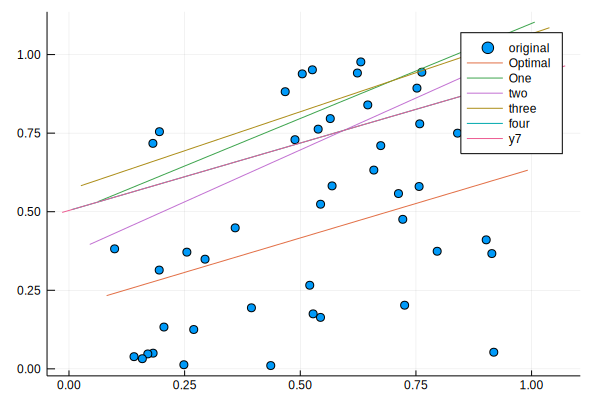

In [13]:
plot!(x -> (-w[1]-w[2]*x)/w[3])

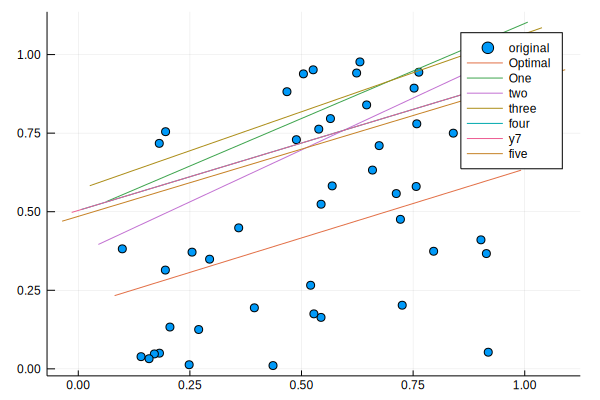

In [14]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="five")

Comparison of the target function and approximated function.

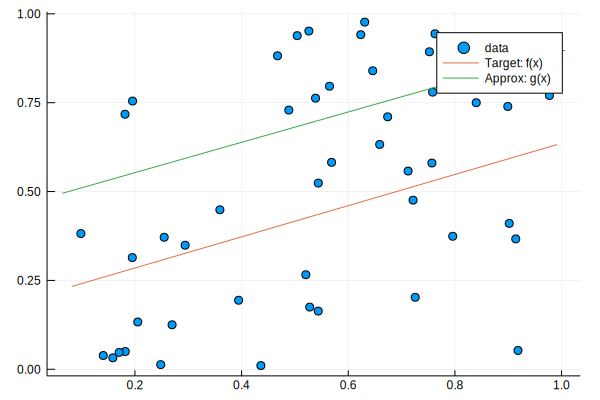

In [15]:
w = perceptron(D, Y, w)
scatter(D, label = "data")
plot!(x -> coeff[1]*x + coeff[2], label = "Target: f(x)")
plot!(x -> (-w[1]-w[2]*x)/w[3], label="Approx: g(x)")

### Reference
 * What the Hell is Perceptron?, Sagar Sharma, Sep 9, 2017. https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53
 
 * A brief history of machine learning, Robert Colner, Mar 4, 2016. https://www.slideshare.net/bobcolner/a-brief-history-of-machine-learning